In [57]:
import numpy as np
import pandas
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

In [58]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
# config = tf.ConfigProto(device_count = {"GPU": 0})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.3

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [59]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
Class = 3

In [60]:
# load dataset
dataframe = pandas.read_csv("DNN_3Class_TR_2048_combfix.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:2048].astype(float)
Y = dataset[:,2048]

In [61]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y,8)

In [62]:
y_train_one_hot = tf.keras.utils.to_categorical(Y, Class)

In [39]:
#define baseline_model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=2048, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.summary()
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [51]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=200, verbose=0)

In [52]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [53]:
results = cross_val_score(estimator, X, y_train_one_hot, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 32)                65568     
_________________________________________________________________
dense_106 (Dense)            (None, 3)                 99        
Total params: 65,667
Trainable params: 65,667
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 32)                65568     
_________________________________________________________________
dense_108 (Dense)            (None, 3)                 99        
Total params: 65,667
Trainable params: 65,667
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
La

In [63]:
y_train_one_hot.shape

(3360, 3)

In [64]:
# load dataset
dataframe = pandas.read_csv("DNN_3Class_Test_2048_combfix.csv", header=None)
dataset = dataframe.values
X_test = dataset[:,0:2048].astype(float)
Y_test = dataset[:,2048]

In [65]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Ytest = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_ytest = np_utils.to_categorical(encoded_Ytest,8)

In [66]:
y_test_one_hot = tf.keras.utils.to_categorical(Y_test, Class)


In [67]:
X_test.shape

(62, 2048)

(array([  15.,    0.,    9.,   75.,  108.,  228.,  741., 1242.,  840.,
         102.]),
 array([0.88947389, 1.22685388, 1.56423387, 1.90161386, 2.23899385,
        2.57637384, 2.91375384, 3.25113383, 3.58851382, 3.92589381,
        4.2632738 ]),
 <a list of 10 Patch objects>)

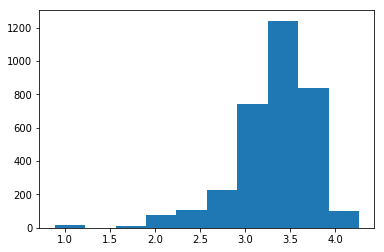

In [68]:
plt.hist(np.mean(X, axis=1))

In [16]:
#####SVEN
########## HYPER PARAMETERS
batch_size = 128
epochs = 100
optimizer = tf.keras.optimizers.Adam()
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(92, activation='relu', input_shape=(2048,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(48, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(16, activation='relu'))#WAS removed 
model.add(tf.keras.layers.Dense(Class, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_one_hot))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 92)                188508    
_________________________________________________________________
dropout_1 (Dropout)          (None, 92)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 48)                4464      
_________________________________________________________________
dropout_2 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 392       
Total params: 193,364
Trainable params: 193,364
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdim

3360/3360 [==============================]3360/3360 [==============================] - 1s 184us/step - loss: 0.1983 - acc: 0.9226 - val_loss: 2.0634 - val_acc: 0.5484

Epoch 38/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 202us/step - loss: 0.2068 - acc: 0.9092 - val_loss: 2.7078 - val_acc: 0.5484

Epoch 39/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 176us/step - loss: 0.1879 - acc: 0.9283 - val_loss: 2.6302 - val_acc: 0.5323

Epoch 40/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 195us/step - loss: 0.1942 - acc: 0.9238 - val_loss: 2.2791 - val_acc: 0.5645

Epoch 41/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 207us/step - loss: 0.1521 - acc: 0.9426 - val_loss: 2.5716 - val_acc: 0.6129

Epoch 42/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 204us

3360/3360 [==============================]3360/3360 [==============================] - 1s 207us/step - loss: 0.4331 - acc: 0.8366 - val_loss: 1.7370 - val_acc: 0.5645

Epoch 83/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 194us/step - loss: 0.4285 - acc: 0.8414 - val_loss: 1.7219 - val_acc: 0.5645

Epoch 84/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 190us/step - loss: 0.4245 - acc: 0.8449 - val_loss: 1.8207 - val_acc: 0.5484

Epoch 85/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 178us/step - loss: 0.4140 - acc: 0.8455 - val_loss: 2.1825 - val_acc: 0.5323

Epoch 86/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 186us/step - loss: 0.4148 - acc: 0.8470 - val_loss: 1.7352 - val_acc: 0.5645

Epoch 87/100
3360/3360 [==============================]3360/3360 [==============================] - 1s 209us

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.legend()

NameError: name 'history' is not defined

In [104]:
#####VIJETH
########## HYPER PARAMETERS
batch_size = 500
epochs = 50
optimizer = tf.keras.optimizers.Adadelta()
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation='selu', input_shape=(2048,)))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(8, activation='selu', ))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(7, activation='relu', ))
model.add(tf.keras.layers.Dropout(0.9))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(Class, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


history = model.fit(X, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_one_hot))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                20490     
_________________________________________________________________
dropout_33 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 10)                40        
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_34 (Dropout)         (None, 8)                 0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 8)                 32        
_________________________________________________________________
dense_46 (Dense)             (None, 7)                 63        
__________

3360/3360 [==============================]3360/3360 [==============================] - 0s 90us/step - loss: 1.2788 - acc: 0.3824 - val_loss: 1.0896 - val_acc: 0.3548

Epoch 38/50
3360/3360 [==============================]3360/3360 [==============================] - 0s 93us/step - loss: 1.2665 - acc: 0.3839 - val_loss: 1.0854 - val_acc: 0.4032

Epoch 39/50
3360/3360 [==============================]3360/3360 [==============================] - 0s 94us/step - loss: 1.2723 - acc: 0.3866 - val_loss: 1.0826 - val_acc: 0.3871

Epoch 40/50
3360/3360 [==============================]3360/3360 [==============================] - 0s 91us/step - loss: 1.2619 - acc: 0.3824 - val_loss: 1.0879 - val_acc: 0.3871

Epoch 41/50
3360/3360 [==============================]3360/3360 [==============================] - 0s 91us/step - loss: 1.2398 - acc: 0.3997 - val_loss: 1.0792 - val_acc: 0.4516

Epoch 42/50
3360/3360 [==============================]3360/3360 [==============================] - 0s 91us/step - los

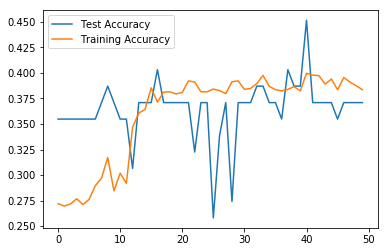

In [105]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.legend()

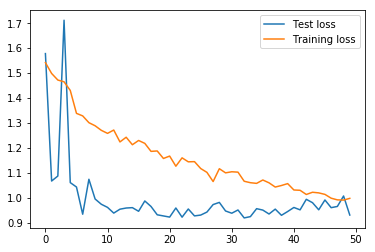

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label="Test loss")
plt.plot(history.history['loss'], label="Training loss")
plt.legend()

In [54]:
# load dataset
dataframe = pandas.read_csv("DNN_3Class_Test_2048_combfix.csv", header=None)
dataset = dataframe.values
X_ans = dataset[:,0:2048].astype(float)
Y_ans = dataset[:,2048]
predictions = baseline_model().predict(X_ans)
PredY = np.zeros(len(Y_ans))
print("Predicted Labels")
for i in range (len(Y_ans)):
   a=list(predictions[i])
   print(a.index(max(a)),end=" ")
   PredY[i] = a.index(max(a))
print("\nActual Labels")
for i in range (len(Y_ans)):
   print(int(Y_ans[i]),end=" ")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 32)                65568     
_________________________________________________________________
dense_116 (Dense)            (None, 3)                 99        
Total params: 65,667
Trainable params: 65,667
Non-trainable params: 0
_________________________________________________________________
Predicted Labels
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
Actual Labels
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [55]:
import array 
from sklearn.metrics import confusion_matrix
import pylab as pl
import matplotlib.pyplot as plt

y_true = Y_ans
#[0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7]
y_pred = PredY
#[2,0,0,6,4,1,0,1,6,1,1,1,2,2,3,0,5,2,0,3,2,6,5,3,5,5,3,1,3,4,5,5,5,4,4,7,7,7,3,3,4,5,4,5,3,6,2,6,6,6,6,6,6,3,7,3,7,7,3,1,7,7]
cm = confusion_matrix(y_true, y_pred)



[[ 0 22  0]
 [ 0 23  0]
 [ 0 17  0]]


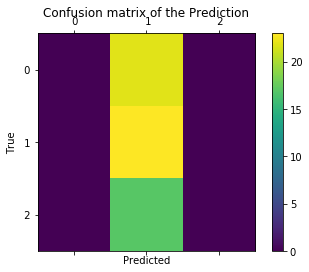

In [56]:
print(cm)
labels = [' 0', ' 1', ' 2', ' 3', ' 4', ' 5',' 6', ' 7']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Prediction')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels( [''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()